## Resumo aula 6 de Machine Learning ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, f1_score,recall_score,accuracy_score,precision_score,make_scorer,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline


In [79]:
data = pd.read_csv('data.csv')

data = data.drop(columns='Unnamed: 32')

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [80]:
y = data['diagnosis']
X = data.drop(columns='diagnosis')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

steps = [('std_scaler', StandardScaler()),
         ('abcmeta', DecisionTreeClassifier())]

metrics = {'f1':make_scorer(f1_score, pos_label='M'),
           'recall':make_scorer(recall_score, pos_label='M'),
           'precision':make_scorer(precision_score, pos_label='M')}

pipe = Pipeline(steps=steps)

kf5 = KFold(n_splits=5)

model = cross_validate(estimator=pipe, X=X_train, y=y_train, scoring=metrics, cv=kf5, return_train_score=True)

In [81]:
pd.DataFrame(model)

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.012994,0.006999,0.923077,1.0,0.888889,1.0,0.960000,1.0
1,0.007999,0.005000,0.968750,1.0,0.968750,1.0,0.968750,1.0
2,0.007999,0.006001,0.869565,1.0,0.909091,1.0,0.833333,1.0
3,0.007999,0.005001,0.861538,1.0,0.848485,1.0,0.875000,1.0
4,0.007000,0.005000,0.775510,1.0,0.826087,1.0,0.730769,1.0


In [82]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

# plot_tree(dtc)

y = data['diagnosis']
X = data.drop(columns='diagnosis')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dtc = DecisionTreeClassifier(max_depth=3)

model = dtc.fit(X_train,y_train)
matrix= classification_report(y_test, model.predict(X_test))

              precision    recall  f1-score   support

           B       0.88      1.00      0.94       107
           M       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



[Text(430.55555555555554, 660.625, 'X[23] <= 112.8\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(258.33333333333337, 471.875, 'X[28] <= 0.181\ngini = 0.135\nsamples = 260\nvalue = [241, 19]'),
 Text(172.22222222222223, 283.125, 'X[14] <= 35.435\ngini = 0.083\nsamples = 252\nvalue = [241, 11]'),
 Text(86.11111111111111, 94.375, 'gini = 0.042\nsamples = 234\nvalue = [229, 5]'),
 Text(258.33333333333337, 94.375, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(344.44444444444446, 283.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(602.7777777777778, 471.875, 'X[28] <= 0.14\ngini = 0.122\nsamples = 138\nvalue = [9, 129]'),
 Text(516.6666666666667, 283.125, 'X[2] <= 16.78\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(430.55555555555554, 94.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(602.7777777777778, 94.375, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(688.8888888888889, 283.125, 'gini = 0.0\nsamples = 113\nvalue = [0, 113]')]

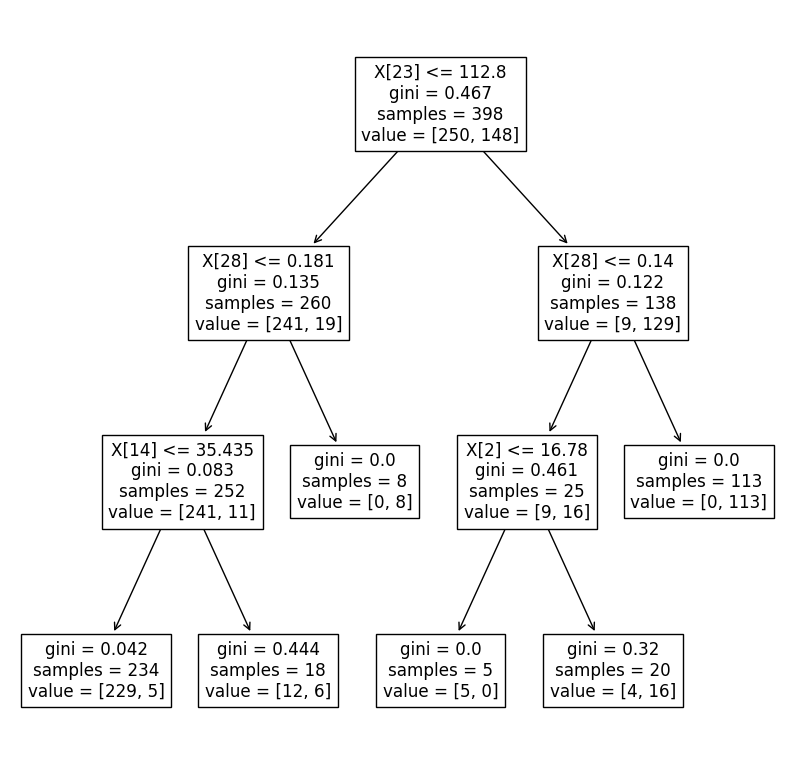

In [87]:
print(matrix)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=100)

plot_tree(dtc)

In [ ]:
iris = sns.dataset